<a href="https://colab.research.google.com/github/TimWang318/numerical-analysis/blob/main/%E4%B8%AD%E9%BB%9E%E7%A9%8D%E5%88%86%E6%B3%95%E8%88%87%E6%88%AA%E6%96%B7%E8%AA%A4%E5%B7%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install matplotlib numpy

6.1999988096453125


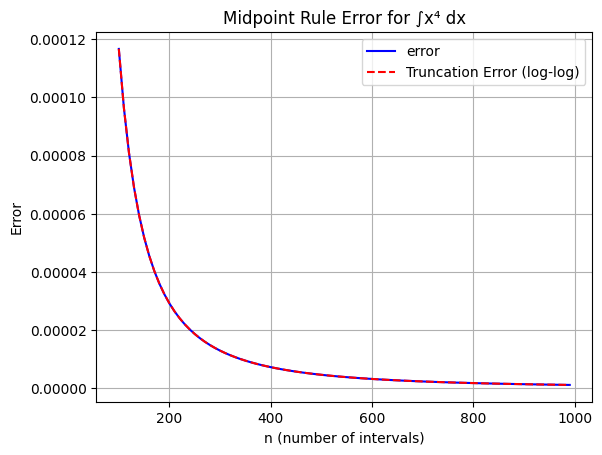

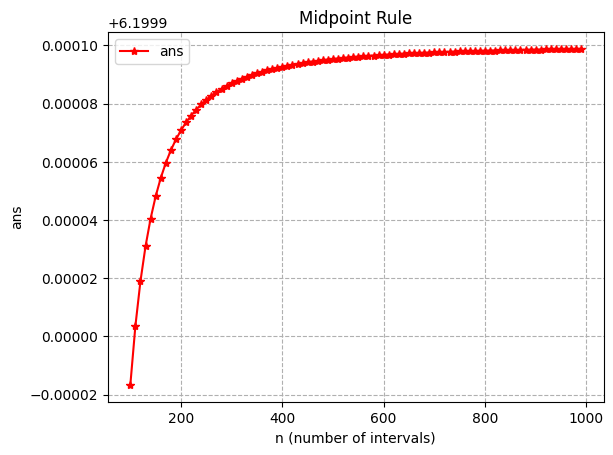

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# 積分下限與上限 / Lower and upper limits of integration
a = 1  # 下限 lower bound
b = 2  # 上限 upper bound

# 定義被積分的函數 f(x) = x^4 / Define the function to integrate
def f(x):
    return x**4

# 定義函數的二階導數 f''(x) = 12x^2 / Define the second derivative of f(x)
def ddf(x):
    return 12*x**2

# 中點法數值積分實作函數（包含截斷誤差估算）/ Midpoint rule with truncation error
def mid(f, a, b, n, ddf_func):
    x = np.linspace(a, b, n+1)  # 把 [a, b] 等分成 n 個區間 / Divide [a,b] into n intervals
    h = float((b - a) / n)      # 每個區間的寬度 / Width of each interval
    s = 0.0                     # 儲存積分總和 / Accumulator for integration
    total_trun_error = 0.0     # 儲存截斷誤差總和 / Accumulator for total truncation error

    for i in range(n):
        mk = float((x[i+1] + x[i]) / 2)  # 計算每個區間的中點 / Midpoint of each subinterval
        s += f(mk)                       # 將函數值加總 / Add function value at midpoint
        h_interval = float(x[i+1] - x[i])  # 這段區間的寬度 / Width of this subinterval

        # 計算截斷誤差（理論公式）/ Truncation error for midpoint rule
        trun_error_term = -(h_interval**3)/24 * ddf_func(mk)
        total_trun_error += trun_error_term  # 累加截斷誤差 / Accumulate truncation error

    ans = s * h  # 最終積分值為總和乘以區間寬 / Final integral = sum × step size
    return ans, total_trun_error

# 準備不同區間數進行誤差收斂觀察 / Vary number of intervals to observe error convergence
x_vals = np.arange(100, 1000, 10)  # 區間數從100到990（步長10）/ Number of intervals: 100 to 990
error_vals = []            # 儲存實際誤差值 / Store actual error values
anns_vals = []             # 儲存近似積分值 / Store approximate integral values
anns_trun_error_vals = []  # 儲存截斷誤差估計值 / Store estimated truncation errors

# 執行每一個區間數的計算 / Loop over all interval counts
for ii in x_vals:
    # 執行中點法並取得結果與截斷誤差 / Perform midpoint rule and get result + truncation error
    anss, total_trun_error_val = mid(lambda x: f(x), a, b, ii, lambda x: ddf(x))

    anns_trun_error_vals.append(total_trun_error_val)  # 紀錄截斷誤差 / Save truncation error

    # 真實誤差 = 真值 - 近似值 / True error = Exact - Approximation
    error = (31/5) - anss
    error_vals.append(error)
    anns_vals.append(anss)  # 紀錄積分值 / Save approximation

# 印出最後一次的近似結果 / Print the final integral value
print(anss)

# 畫出誤差與截斷誤差收斂圖 / Plot true error and truncation error
plt.plot(x_vals, error_vals, color='blue', label='error')  # 實際誤差 / Actual error
plt.plot(x_vals, np.abs(anns_trun_error_vals), color='red', linestyle='--', label='Truncation Error (log-log)')  # 截斷誤差 / Truncation error

plt.xlabel("n (number of intervals)")  # x軸：區間數 / x-axis: number of intervals
plt.ylabel("Error")  # y軸：誤差 / y-axis: error
plt.title("Midpoint Rule Error for ∫x⁴ dx")  # 圖標題（修正為 x⁴）/ Title of plot
plt.grid(True)  # 加上格線 / Show grid
plt.legend()    # 顯示圖例 / Show legend
plt.show()      # 顯示圖表 / Display plot

# 畫出積分值隨 n 變化的趨勢 / Plot how the approximate value changes with n
plt.plot(x_vals, np.abs(anns_vals), color='red', marker='*', label='ans')  # 近似值 / Approximated result

plt.xlabel("n (number of intervals)")
plt.ylabel("ans")
plt.title("Midpoint Rule")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()
